# Comparing Different Search Strategies: Maze

__Notes:__

* Breaking ties: 
    * The order in which the children are explored (see `available directions`) makes a big difference for DFS and dealing with empty spaces. I explore the directions in random order which makes the algorithm stochastic!
    * Ties for $h(n)$ and $f(n)$ need to be broken in a consistent manner. I use the most recently added node. To try to keep moving into the same direction.
* Cycles: Cycles are avoided using the reached data structure. For DFS, we can use the reached structure for checking or, without a reached structure implement cycle checking with only parents. 
* Depth-limited search needs ideas from best-first search to work with open spaces!
* Some better data structures could be used (heaps).

__Fixme:__ DFS should check nodes in the frontier.


Helper functions for the Maze Assignment by M. Hahsler
Usage: 
  import maze_helper as mh
  mh.show_some_mazes()
  
Here is an example maze:

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX

The goal is at (np.int64(8), np.int64(1)).
Position(0,0): X
Position(8,1):  


<Figure size 640x480 with 0 Axes>

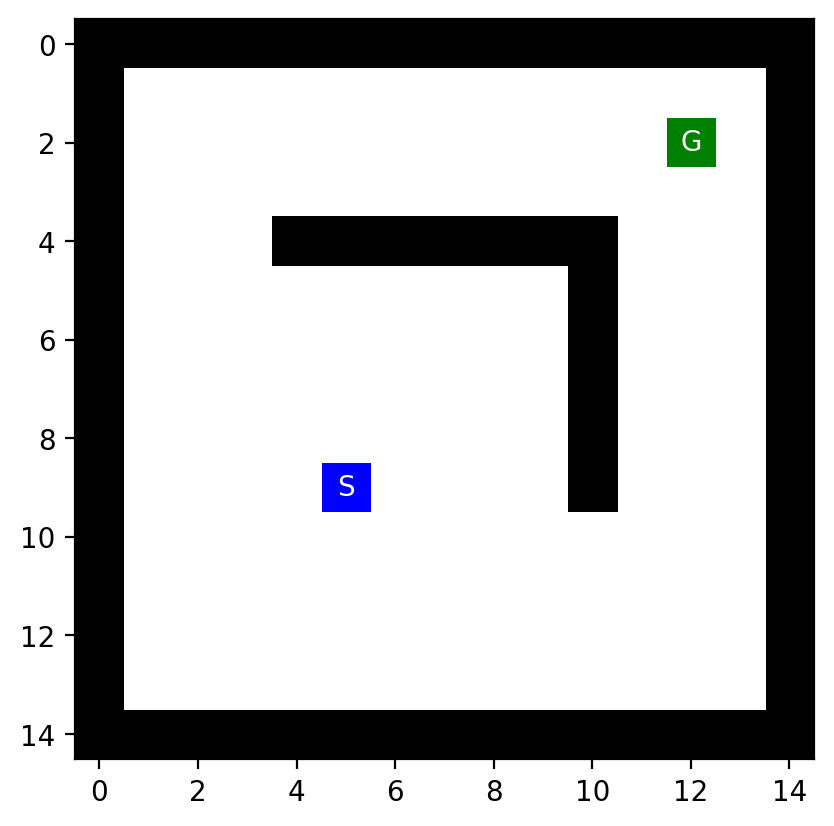

In [34]:
%run maze_helper.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

#f = open("small_maze.txt", "r")
#f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
#f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_2_maze.txt", "r")
#f = open("wall_maze.txt", "r")
#f = open("loops_maze.txt", "r")
f = open("L_maze.txt", "r")

maze_str = f.read()
maze = parse_maze(maze_str)

# look at two positions in the maze
print("Position(0,0):", maze[0, 0])
print("Position(8,1):", maze[8, 1])

show_maze(maze)

## Implementation

Implement the algorithms following the pseudo code from the slides/textbook.

In [35]:
# tree_search.py has my actual implementation
from tree_search_solution import *
import tree_search_solution as tree_search

### Heuristics

Heuristics $h(n)$

In [36]:
def manhattan(pos1, pos2):
    """returns the Manhattan distance between two positions"""
    return(np.sum(np.abs(np.subtract(pos1, pos2))))
    
print(manhattan((0,0), (1,1)))

2


In [37]:
def euclidean(pos1, pos2):
    """returns the Euclidean distance between two positions"""
    return(np.sqrt(np.sum(np.square(np.subtract(pos1, pos2)))))

print(euclidean([0,0], [1,1]))

1.4142135623730951


In [38]:
tree_search.heuristic = manhattan
#tree_search.heuristic = euclidean

## Experiments

### BFS

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 3.79 ms, sys: 0 ns, total: 3.79 ms
Wall time: 3.5 ms
Path length: 16
Reached squares: 151


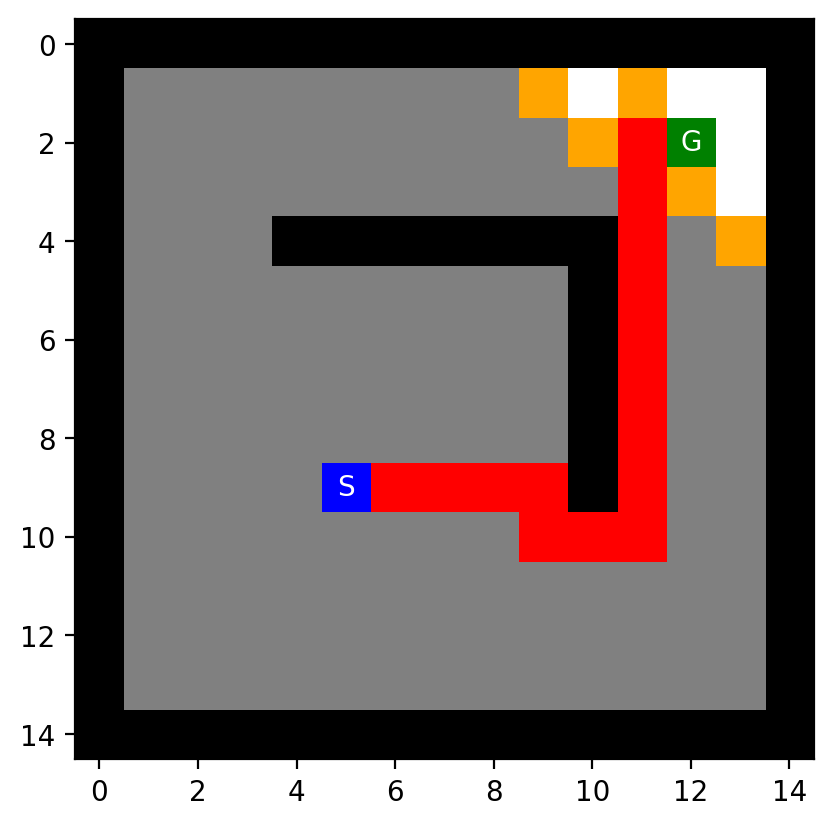

['E',
 'E',
 'E',
 'E',
 'S',
 'E',
 'E',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'E']

In [39]:
tree_search.set_order("NESW")
#tree_search.set_order(random=True)
%time result = best_first_search(maze, strategy = "BFS", debug = False, vis = False)
show_path(maze, result)
result['actions']

Directions are checked at every step in random order.
CPU times: user 5.16 ms, sys: 77 μs, total: 5.24 ms
Wall time: 4.47 ms
Path length: 16
Reached squares: 151


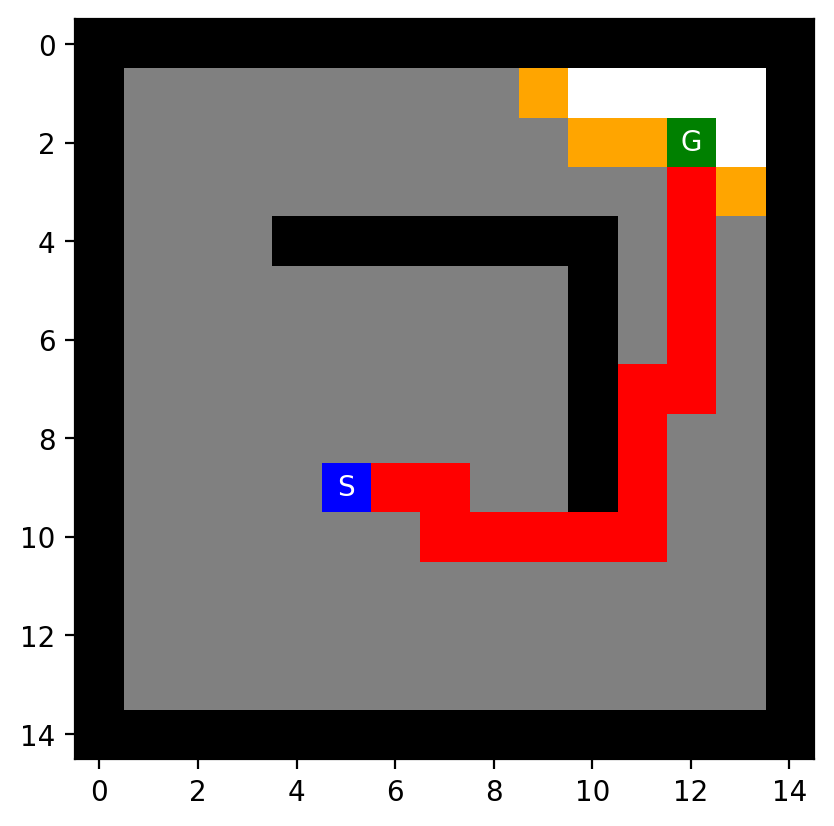

['E',
 'E',
 'S',
 'E',
 'E',
 'E',
 'E',
 'N',
 'N',
 'N',
 'E',
 'N',
 'N',
 'N',
 'N',
 'N']

In [40]:
#tree_search.set_order("NESW")
tree_search.set_order(random=True)
%time result = best_first_search(maze, strategy = "BFS", debug = False, vis = False)
show_path(maze, result)
result['actions']

### DFS

Use the tree search implementation from BFS and just change the order in which the frontier is explored. 

__Important Notes:__ 
* This implementation keeps the whole search tree in memory (reached structure) and has space complexity of  $O(b^m)$ ($m$ is the longest path in the search tree) which is worse than BFS's  $O(b^d)$ ($d$ is the depth of the shallowest goal state)!
* The time complexity is worse than BFS (even though the runtime is better for this problem).

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 1.28 ms, sys: 0 ns, total: 1.28 ms
Wall time: 1.18 ms
Path length: 80
Reached squares: 149


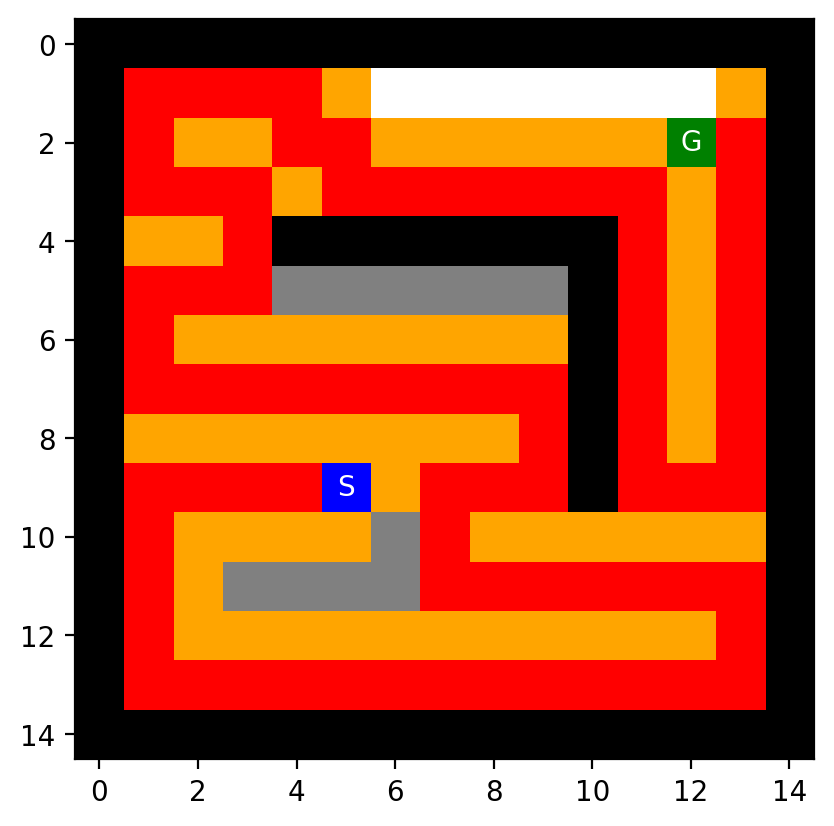

In [41]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
# We can alter the order in which the directions are added to the frontier

tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)


%time result = best_first_search(maze, strategy = "DFS", debug = False, vis = False)
show_path(maze, result)

Directions are checked in the order ['S', 'E', 'N', 'W']
CPU times: user 591 μs, sys: 0 ns, total: 591 μs
Wall time: 547 μs
Path length: 24
Reached squares: 49


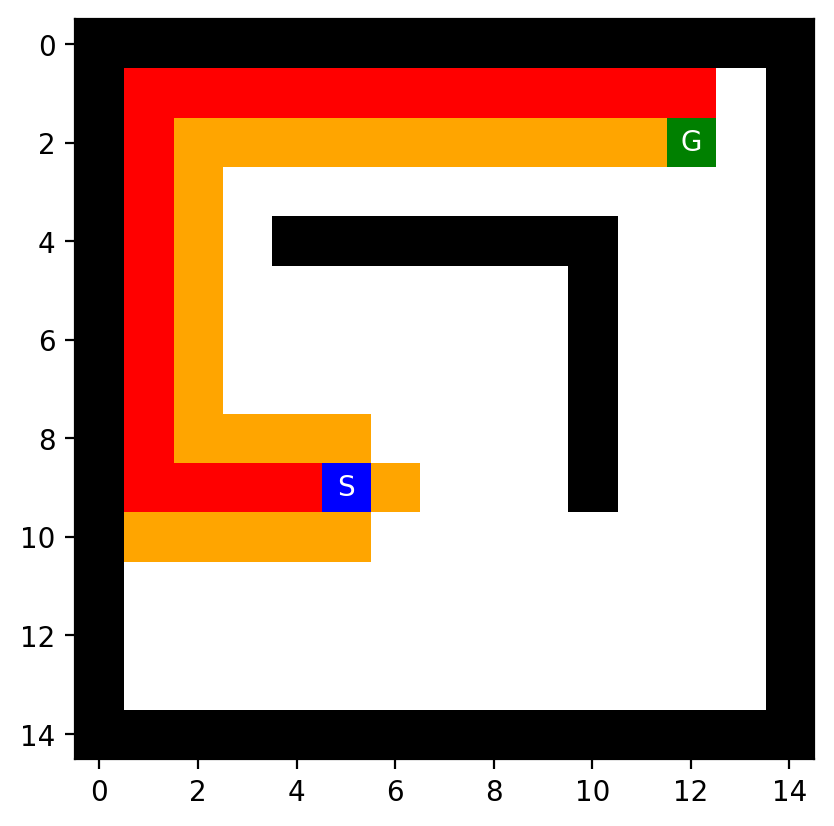

In [42]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "DFS", debug = False, vis = False)
show_path(maze, result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 309 μs, sys: 31 μs, total: 340 μs
Wall time: 314 μs
Path length: 24
Reached squares: 53


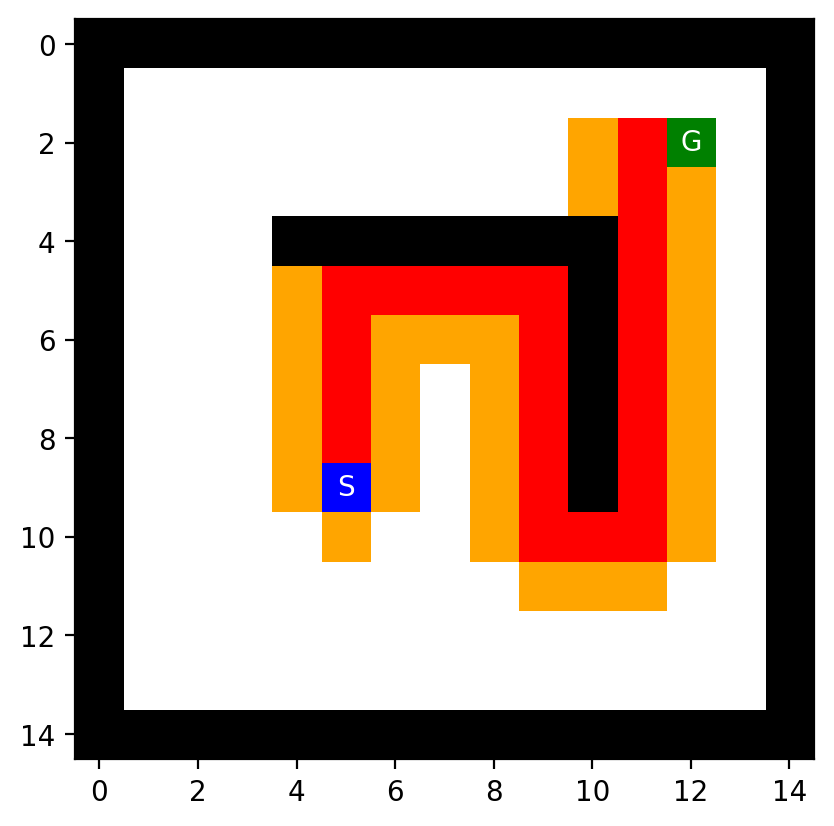

In [43]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "DFS", debug = False, vis = False)
show_path(maze, result)

Directions are checked at every step in random order.
CPU times: user 548 μs, sys: 55 μs, total: 603 μs
Wall time: 555 μs
Path length: 44
Reached squares: 84


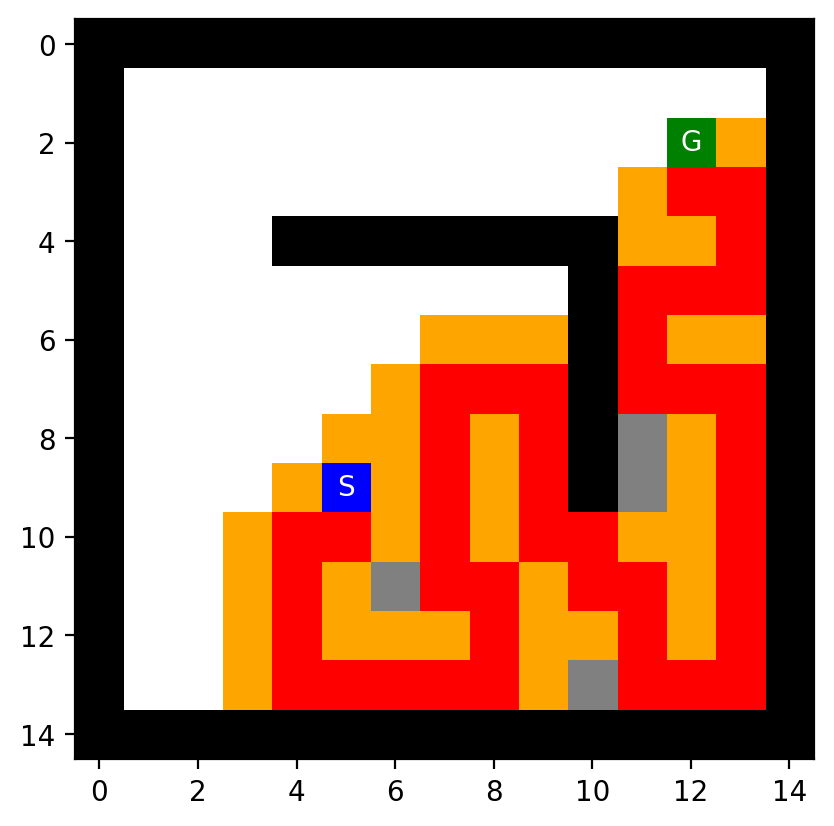

In [44]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "DFS", debug = False, vis = False)
show_path(maze, result)

### DFS with no reached data structure

This has space complexity $O(bm)$ instead of $O(b^m)$ when we reuse the tree search algorithm from BFS!

Since we cannot check all cycles, we still may get infinite loops. Here are possible solutions:
* Stop after a fixed number of tries and return no solution `max_tries`.
* IDS solves this problem.

CPU times: user 1.74 ms, sys: 115 μs, total: 1.85 ms
Wall time: 1.7 ms
Path length: 74
Reached squares: 117


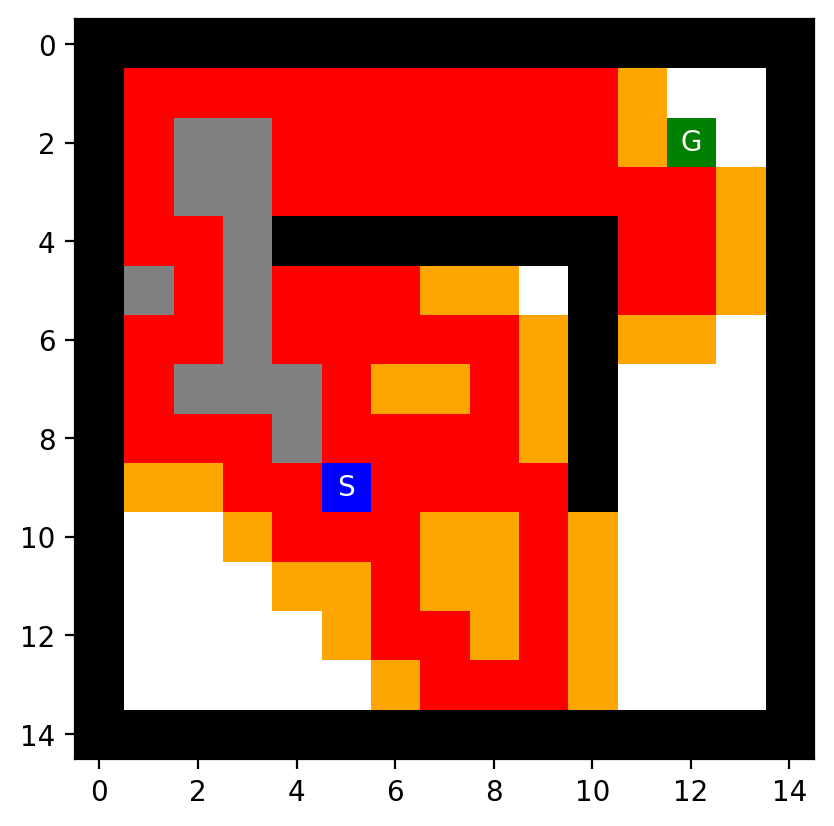

In [45]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# Can get stuck for empy maze since cycle checking is not string enough! 
# I use a maximum number of tries and stop if the goal is not reached.
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = DFS(maze, vis = False, max_tries = 100000, debug_reached = True)

#result
show_path(maze, result)
if result['path'] is None:
    print("No solution found!")

We could do a random walk and not check for cycles. This is guaranteed to reach eventually any square including the goal, 
but creates a long path. The path could be simplified leading to the [Tremaux's algorithm](https://en.wikipedia.org/wiki/Maze_solving_algorithm).

Directions are checked at every step in random order.
CPU times: user 25.3 ms, sys: 8.22 ms, total: 33.5 ms
Wall time: 29.5 ms
Path length: 1018
Reached squares: 141


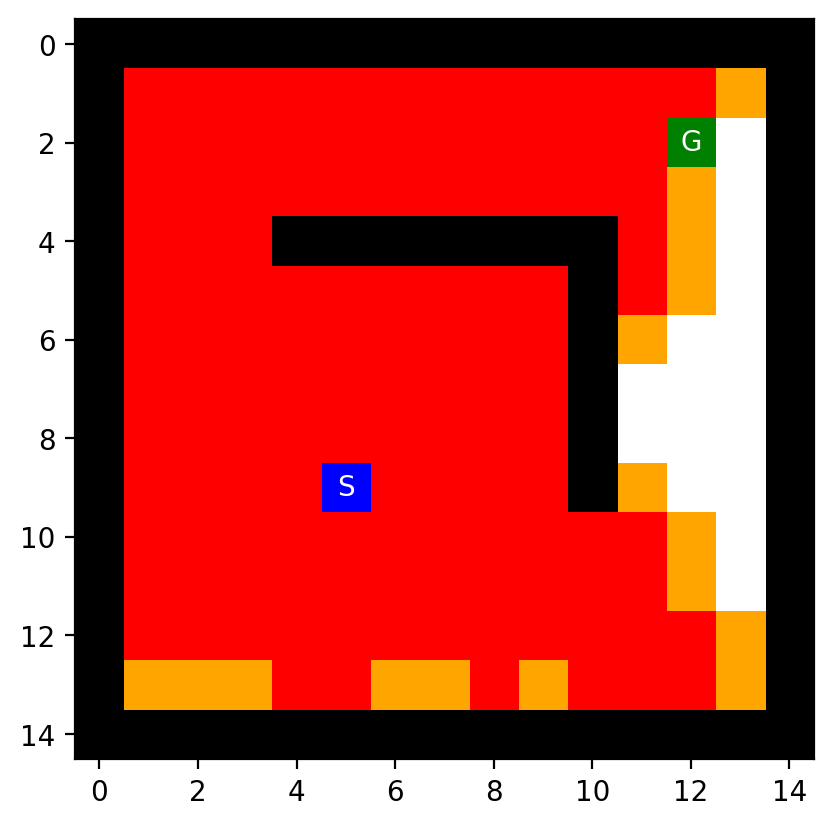

In [46]:
tree_search.set_order(random = True)
%time result = DFS(maze, check_cycle = False, max_tries = 100000, vis = False, debug_reached = True)

#result
show_path(maze, result)
if result['path'] is None:
    print("No solution found!")

### Run randomized DFS multiple times and use the best solution.

__Note:__ IDS takes a similar amount of time and memory, but is guaranteed optimal.

Directions are checked at every step in random order.
CPU times: user 212 ms, sys: 49 μs, total: 212 ms
Wall time: 193 ms
Solutions have path_lengths of [88, 82, 70, 42, 34, 54, 78, 44, 118, 68, 74, 72, 62, 30, 108, 100, 74, 48, 40, 44, 38, 70, 86, 76, 100, 102, 70, 70, 58, 88, 86, 98, 84, 58, 94, 66, 74, 54, 82, 60, 52, 60, 60, 96, 88, 76, 64, 52, 60, 56, 46, 44, 50, 64, 52, 84, 42, 66, 34, 76, 82, 78, 56, 82, 78, 44, 54, 58, 68, 70, 22, 86, 78, 86, 44, 62, 106, 50, 74, 78, 86, 80, 76, 86, 68, 80, 34, 52, 68, 82, 64, 58, 56, 80, 54, 86, 52, 108, 74, 102]
Path length: 22
Reached squares: 0


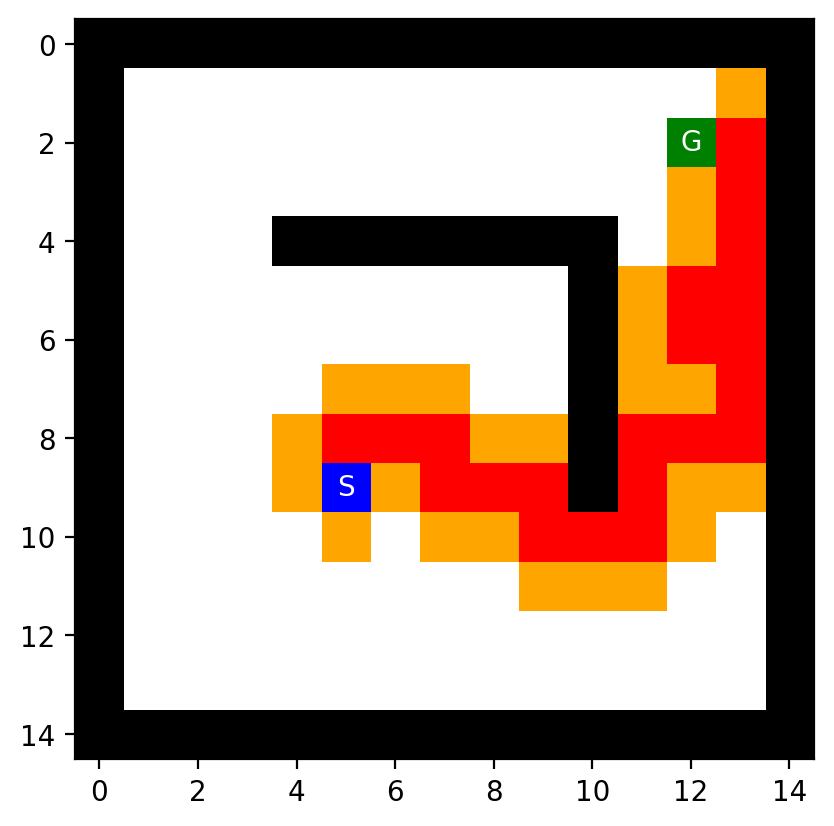

In [47]:
tree_search.set_order(random = True)

N = 100
%time results = [ DFS(maze, max_tries = 10000, vis = False) for _ in range(N) ]

# check if we found a solution and display the best solution
results = [ r for r in results if not r['path'] is None ]
if len(results) > 0:
    path_lengths = [ len(r['path'])-1 for r in results ]

    print(f"Solutions have path_lengths of {path_lengths}")

    result = results[min_index(path_lengths)]
    show_path(maze, result)
else:
    print("No solution found!")

### Depth limited DFS

DFS does not store the explored search tree for visualization so we show it using the tree search implementation.

Directions are checked at every step in random order.
CPU times: user 537 μs, sys: 56 μs, total: 593 μs
Wall time: 546 μs
Reached squares: 57


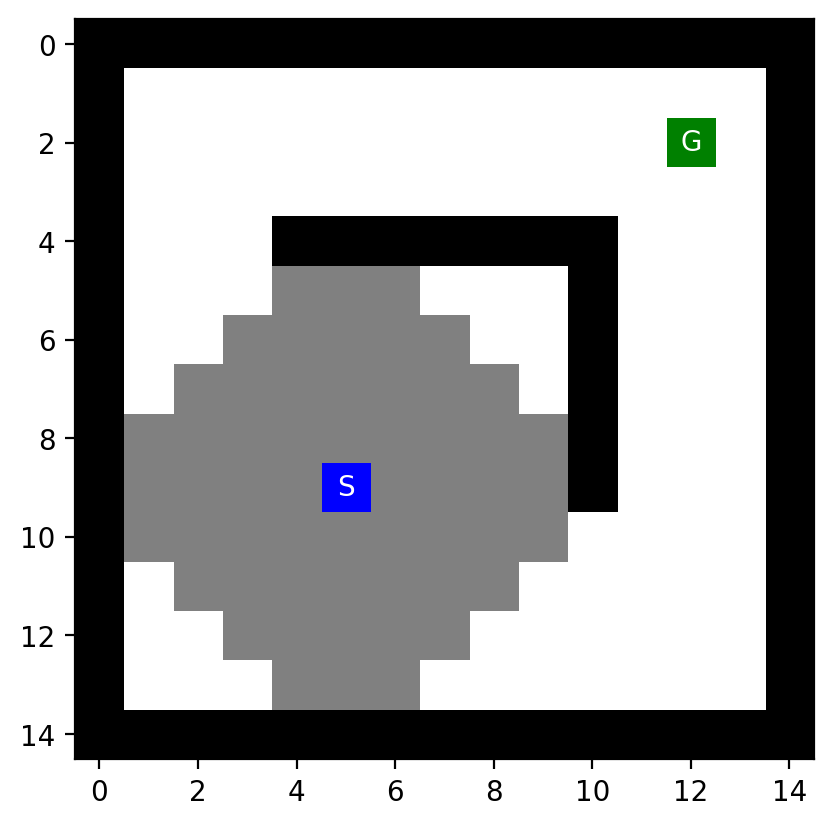

In [48]:
tree_search.set_order(random = True)

#%time result = DFS(maze, limit = 10, debug = False, vis = False)
%time result = best_first_search(maze, strategy = "DFS", limit = 5, debug = False, vis = False)
show_path(maze, result)

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 336 μs, sys: 36 μs, total: 372 μs
Wall time: 343 μs
Reached squares: 34


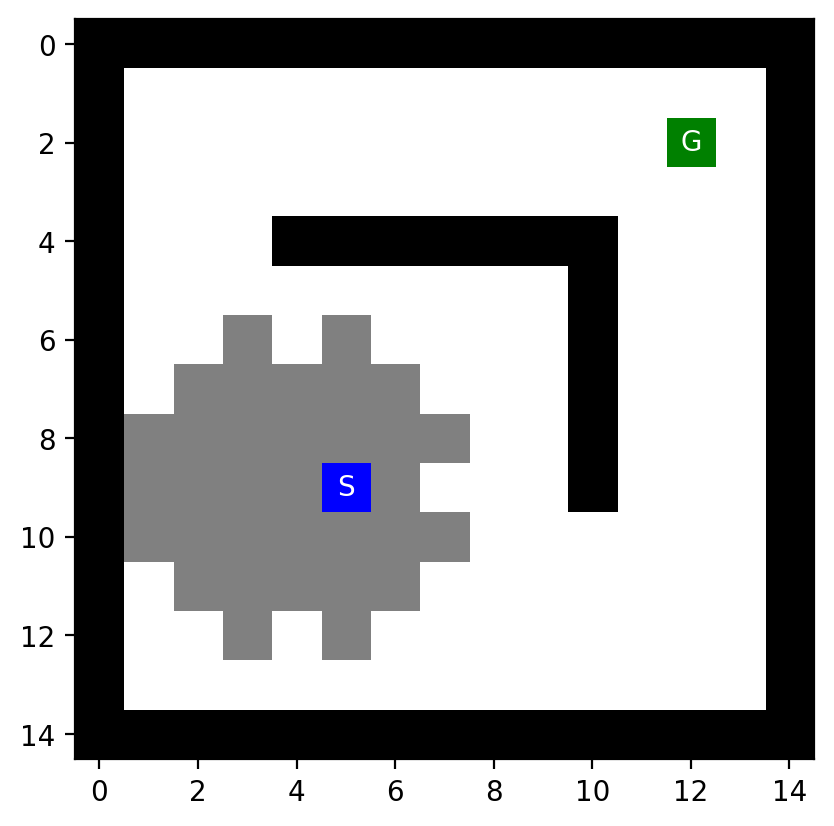

In [49]:
#tree_search.set_order(random=True)
tree_search.set_order("NESW")

%time result = DFS(maze, limit = 5, vis = False, debug_reached = True)
show_path(maze, result)

### IDS

__Notes:__ 

* IDS with DFS does not store reached squares, so gray areas are not shown!

* IDS depends on the cycle checking of DFS and therefore is also affected by these problems.

Directions are checked at every step in random order.
CPU times: user 74.1 ms, sys: 8.72 ms, total: 82.8 ms
Wall time: 73.4 ms
Path length: 32
Reached squares: 0


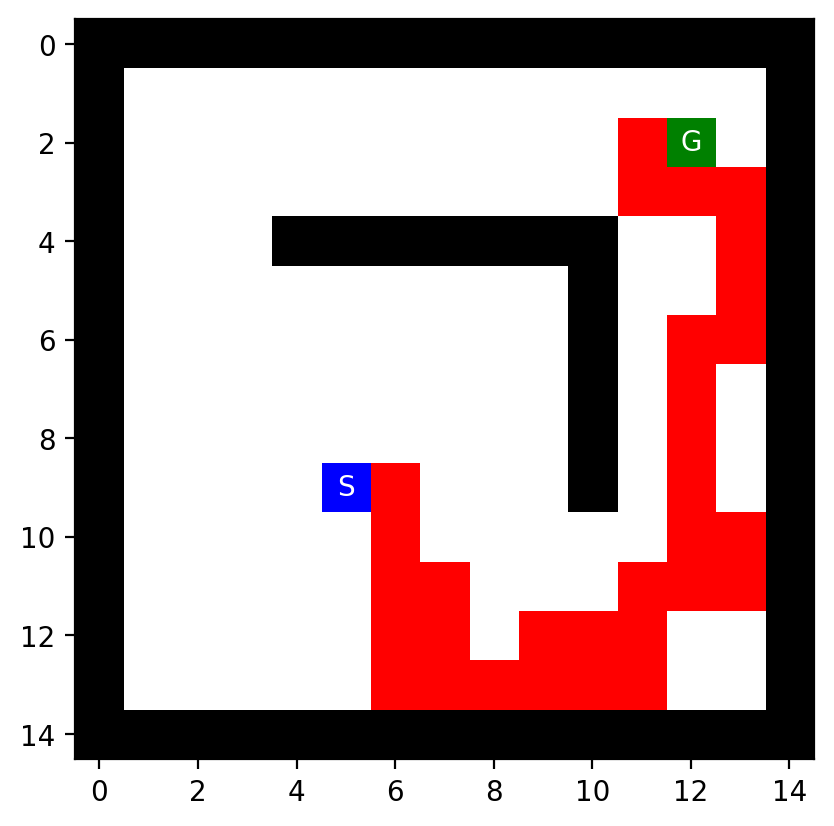

In [50]:
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = IDS(maze, max_tries = 100000)
show_path(maze, result)

Directions are checked at every step in random order.
CPU times: user 45.5 ms, sys: 4.09 ms, total: 49.6 ms
Wall time: 43.7 ms
Path length: 16
Reached squares: 151


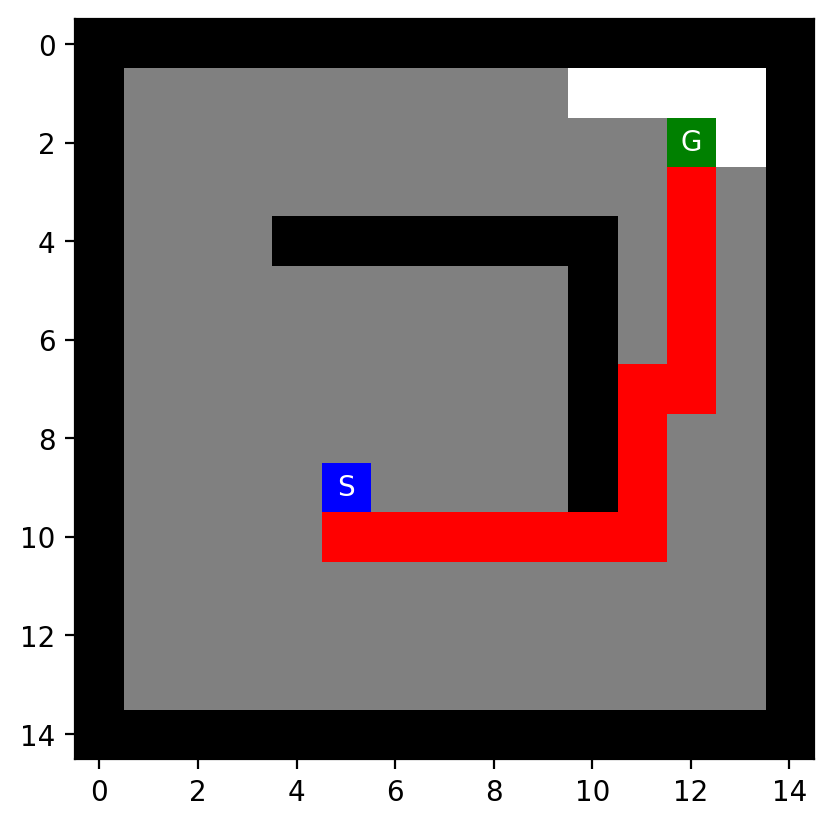

In [51]:
# Use a reached structure. This does not use DFS in the proper way.

#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = IDS_reached(maze, debug = False)
show_path(maze, result)

### GBFS

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 2.84 ms, sys: 0 ns, total: 2.84 ms
Wall time: 2.62 ms
Path length: 16
Reached squares: 61


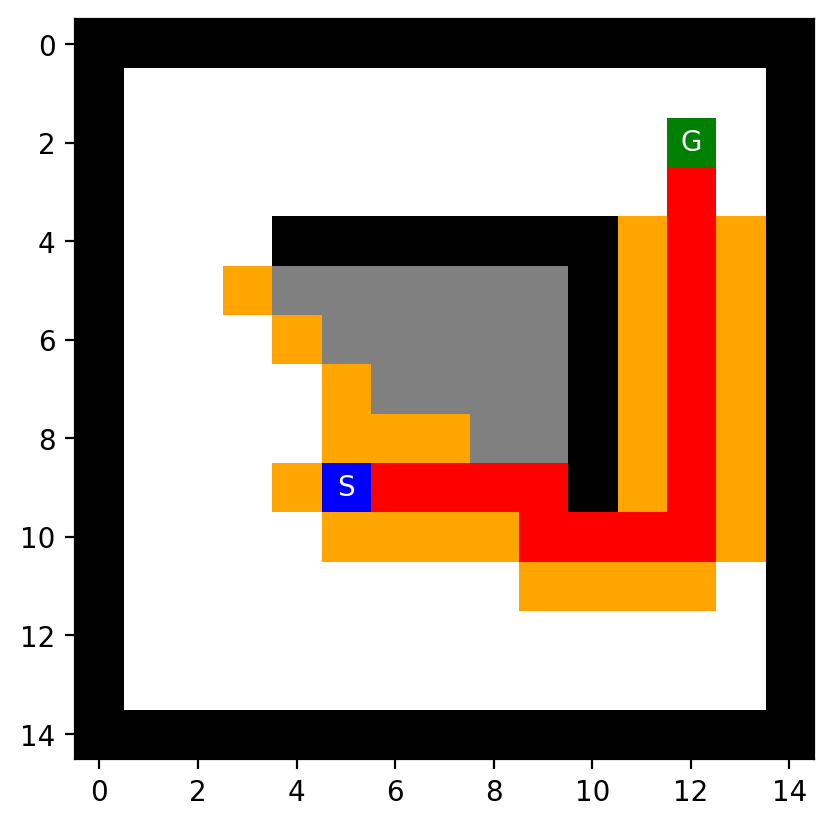

In [52]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False)
show_path(maze, result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 1.24 ms, sys: 134 μs, total: 1.38 ms
Wall time: 1.27 ms
Path length: 22
Reached squares: 56


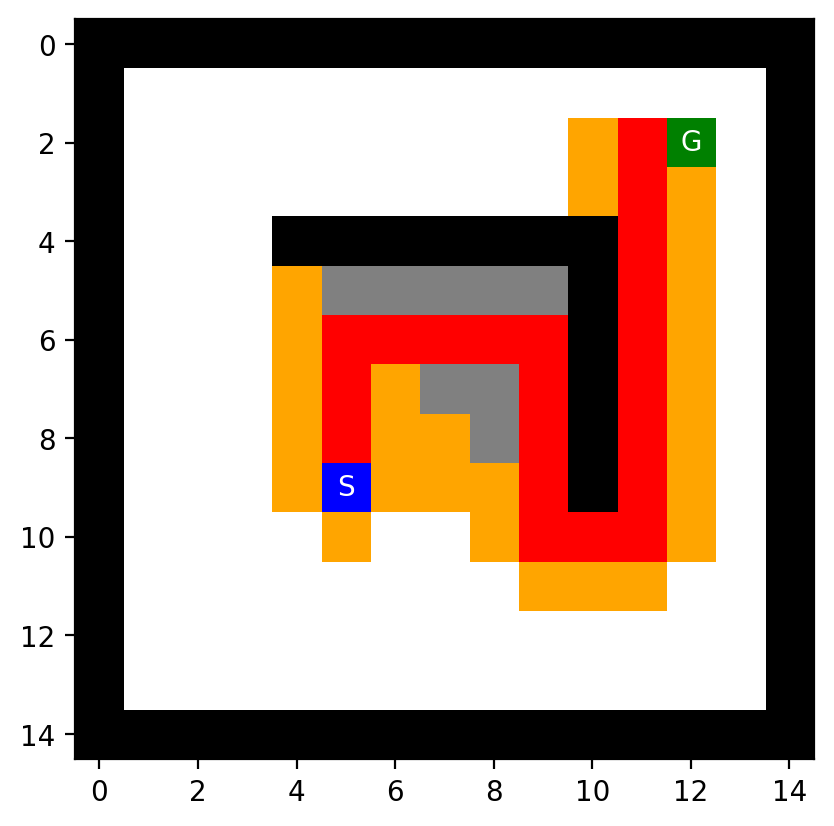

In [53]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False)
show_path(maze, result)

Directions are checked at every step in random order.
CPU times: user 1.05 ms, sys: 112 μs, total: 1.16 ms
Wall time: 1.06 ms
Path length: 18
Reached squares: 54


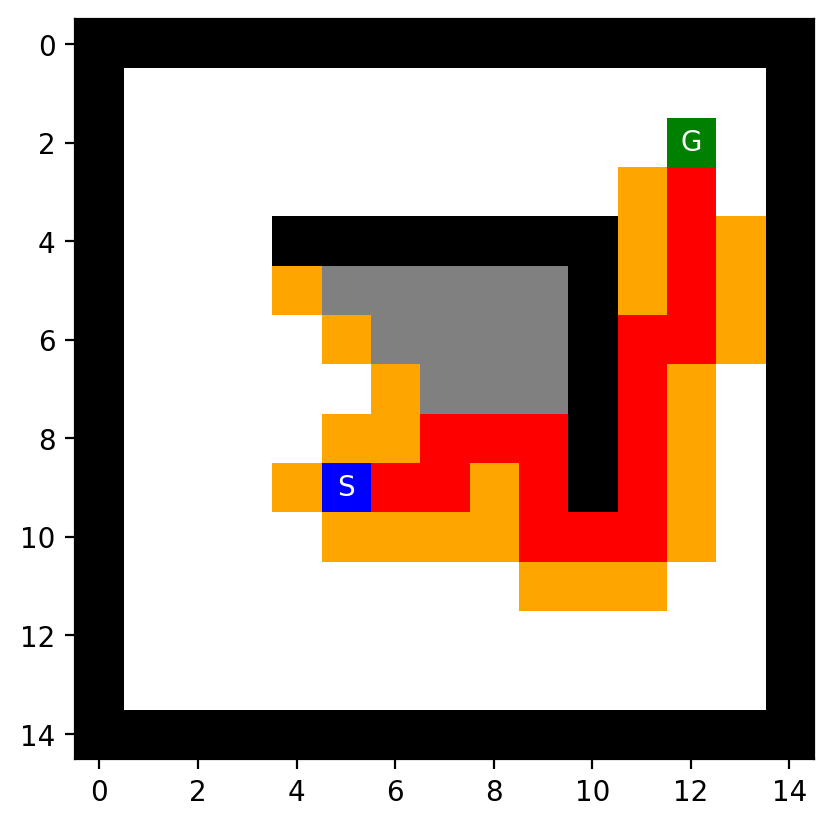

In [54]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False)
show_path(maze, result)

### A* Search

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 1.61 ms, sys: 171 μs, total: 1.78 ms
Wall time: 1.64 ms
Path length: 16
Reached squares: 66


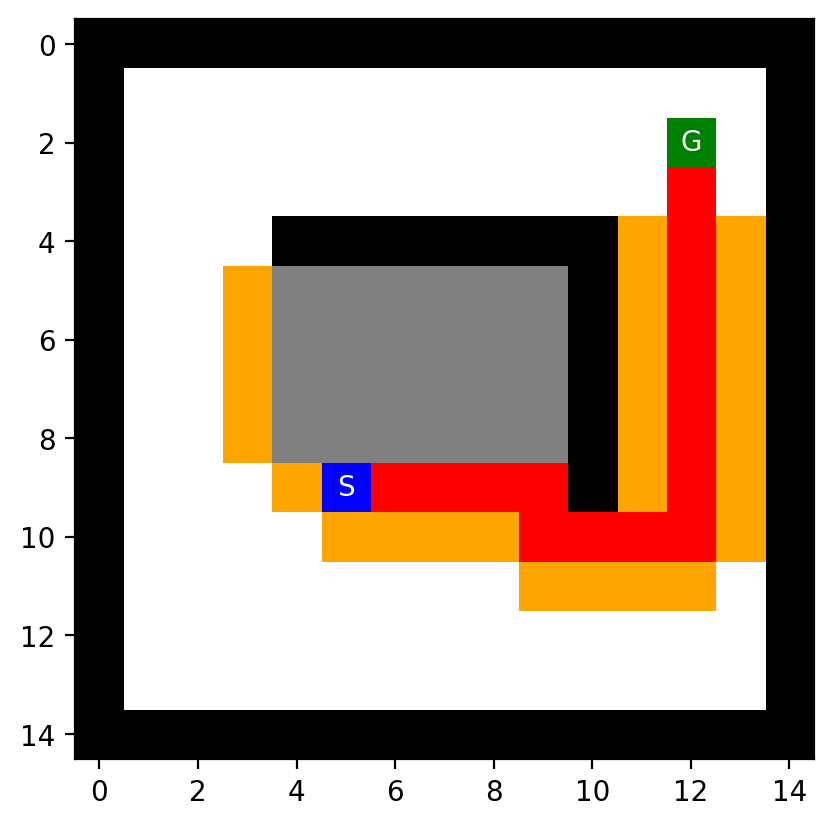

In [55]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False)
show_path(maze, result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 1.29 ms, sys: 0 ns, total: 1.29 ms
Wall time: 1.18 ms
Path length: 16
Reached squares: 58


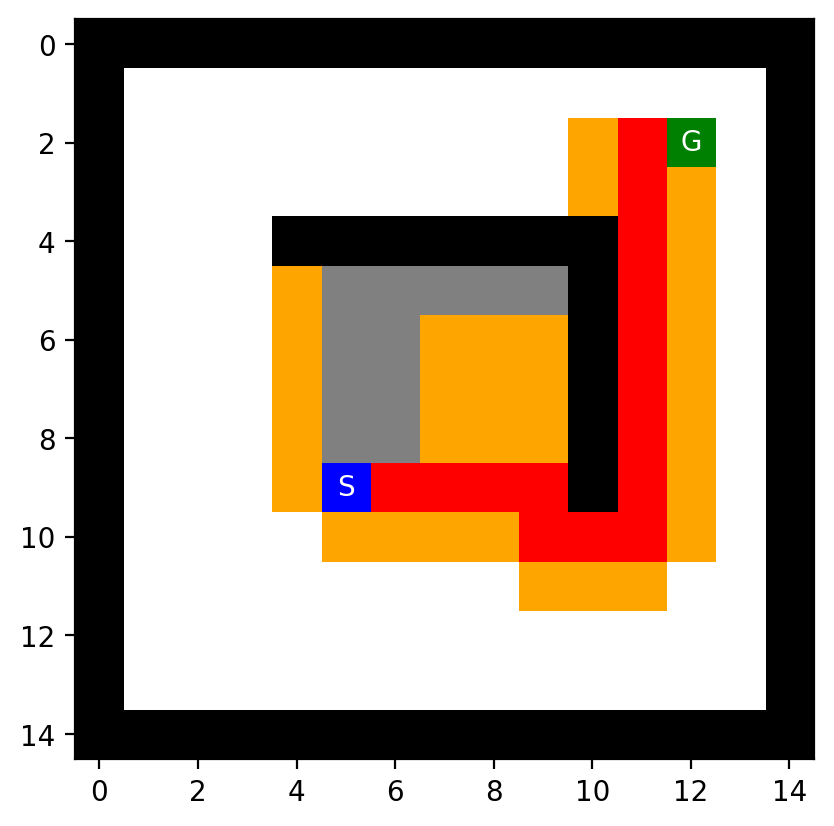

In [56]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False)
show_path(maze, result)

Directions are checked at every step in random order.
CPU times: user 1.83 ms, sys: 0 ns, total: 1.83 ms
Wall time: 1.68 ms
Path length: 16
Reached squares: 66


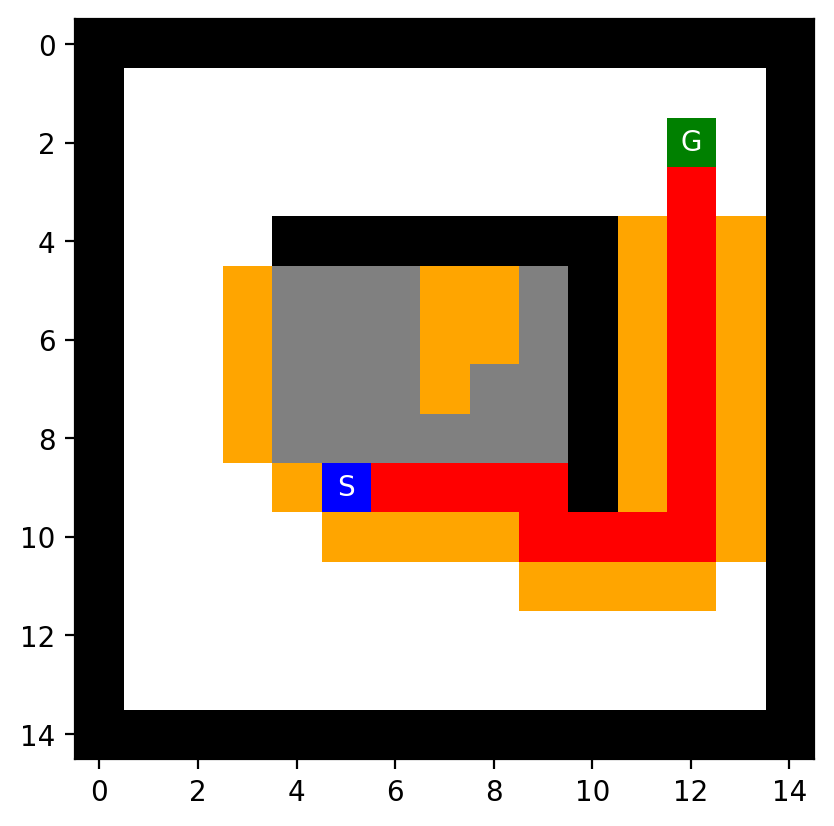

In [57]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False)
show_path(maze, result)

### Weighted A* Search

$W > 1$ tends towards GBFS (optimality is not guaranteed)

Directions are checked at every step in random order.
CPU times: user 2.49 ms, sys: 0 ns, total: 2.49 ms
Wall time: 2.28 ms
Path length: 16
Reached squares: 63


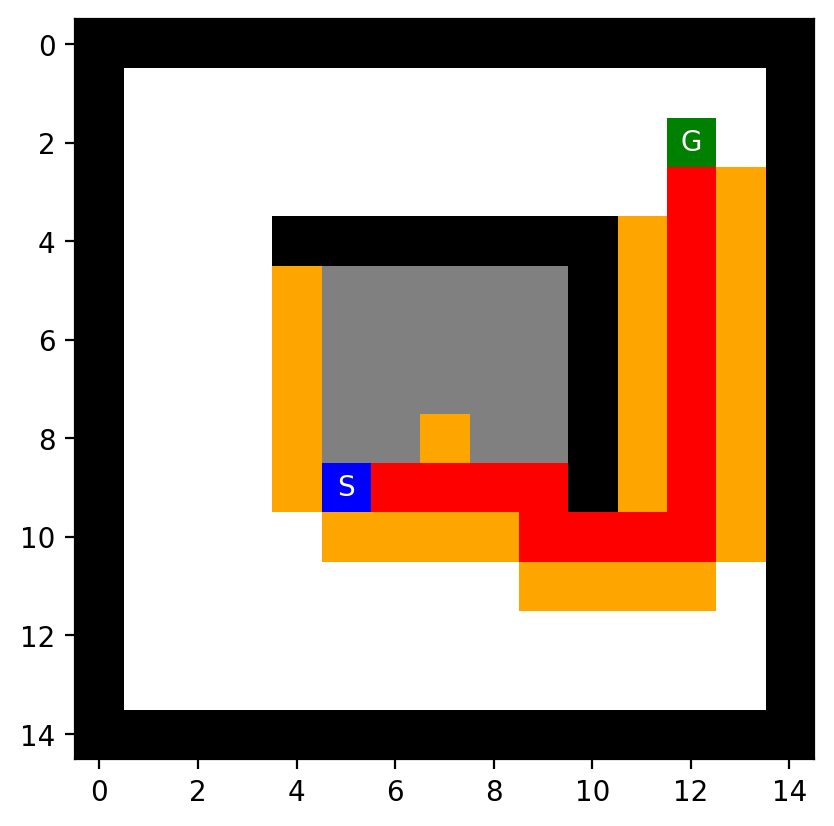

In [58]:
tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "A*", W = 1+1e-9, debug = False, vis = False)
show_path(maze, result)

CPU times: user 1.64 ms, sys: 0 ns, total: 1.64 ms
Wall time: 1.51 ms
Path length: 16
Reached squares: 60


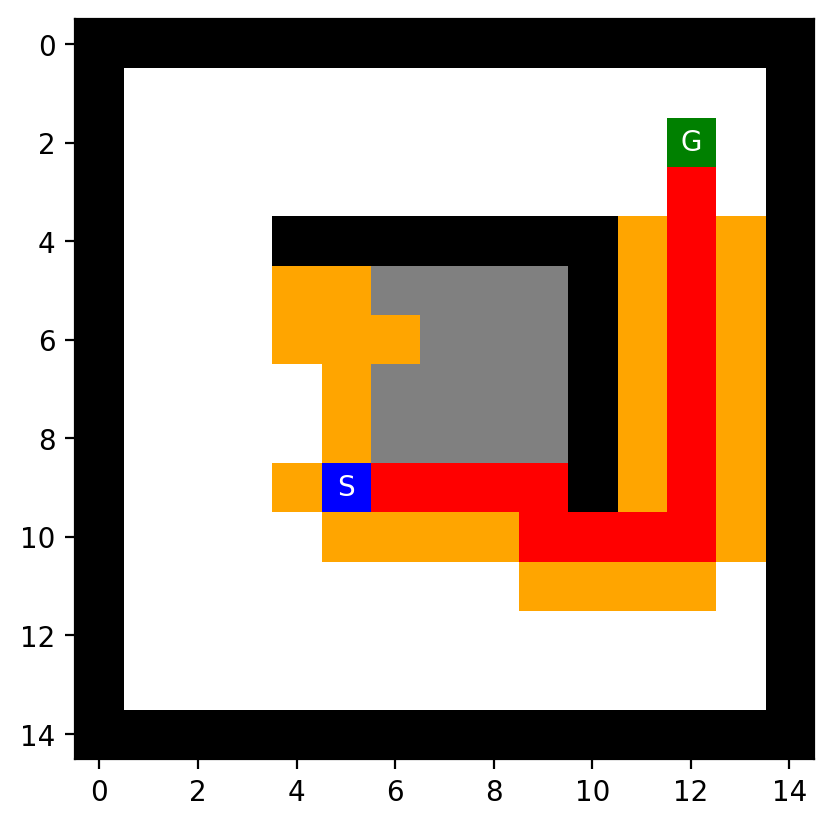

In [59]:
%time result = best_first_search(maze, strategy = "A*", W = 2, debug = False, vis = False)
show_path(maze, result)

CPU times: user 1.59 ms, sys: 0 ns, total: 1.59 ms
Wall time: 1.47 ms
Path length: 20
Reached squares: 58


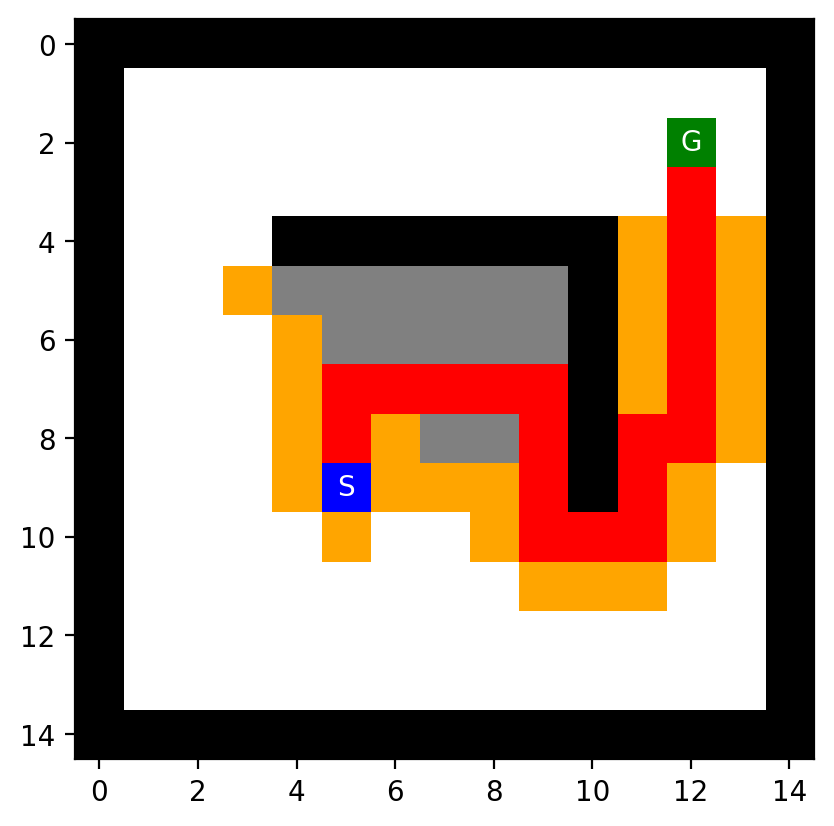

In [60]:
%time result = best_first_search(maze, strategy = "A*", W = 1000, debug = False, vis = False)
show_path(maze, result)

$W<1$ tends towards Uniform-Cost Search/BFS (optimality is guaranteed)

CPU times: user 1.8 ms, sys: 184 μs, total: 1.98 ms
Wall time: 1.82 ms
Path length: 16
Reached squares: 75


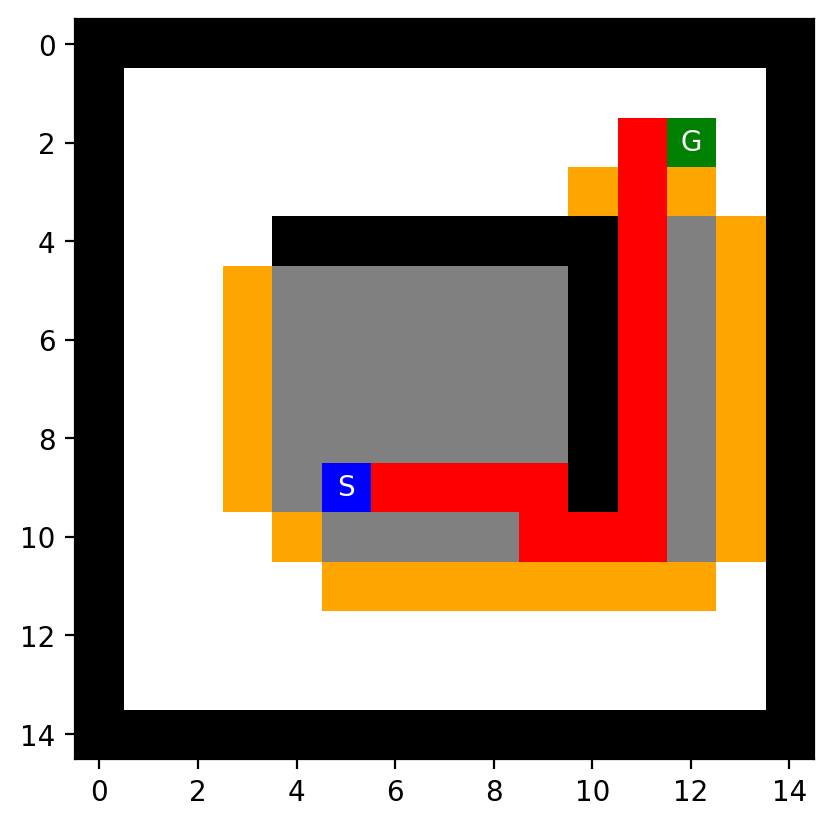

In [61]:
%time result = best_first_search(maze, strategy = "A*", W = 1-1e-9, debug = False, vis = False)
show_path(maze, result)

CPU times: user 6.99 ms, sys: 0 ns, total: 6.99 ms
Wall time: 6.37 ms
Path length: 16
Reached squares: 148


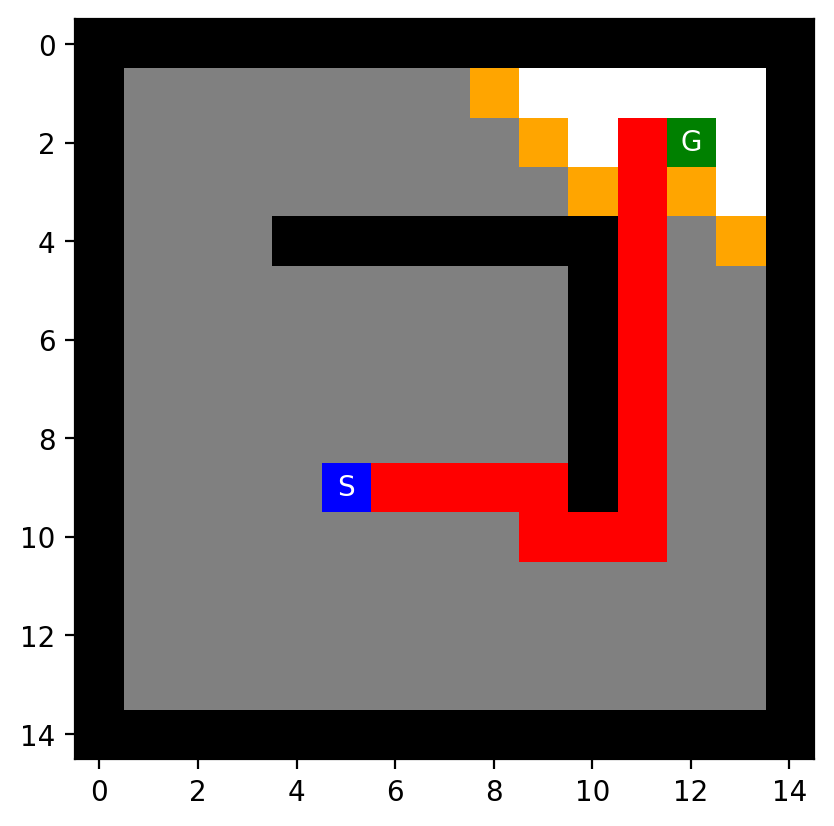

In [62]:
%time result = best_first_search(maze, strategy = "A*", W = .1, debug = False, vis = False)
show_path(maze, result)

### Compare Timing

In [63]:
#f = open("small_maze.txt", "r")
f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
#f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("wall_maze.txt", "r")
#f = open("loops_maze.txt", "r")

#maze_str = f.read()
#maze = parse_maze(maze_str)

tree_search.set_order(random=True)


Directions are checked at every step in random order.


In [64]:
import timeit
import math

reps = 50

times = {}

algorithms = ["BFS", "DFS", "GBFS", "A*"]

### FIXME: add IDS

for a in algorithms:
    times[a] = math.ceil(timeit.timeit(stmt = f'best_first_search(maze, strategy = "{a}", debug = False, vis = False)', 
              setup = 'from __main__ import best_first_search, maze',
                    number = reps)*1e3/reps)
    
times['DFS(no reached)'] = math.ceil(timeit.timeit(stmt = f'DFS(maze, vis = False)', 
              setup = 'from __main__ import DFS, maze',
                    number = reps)*1e3/reps)

In [65]:
import pandas as pd
df = pd.DataFrame(times, index = ["time in ms"])
df

BFS  DFS  GBFS  A*  DFS(no reached)
time in ms    2    1     2   2                2

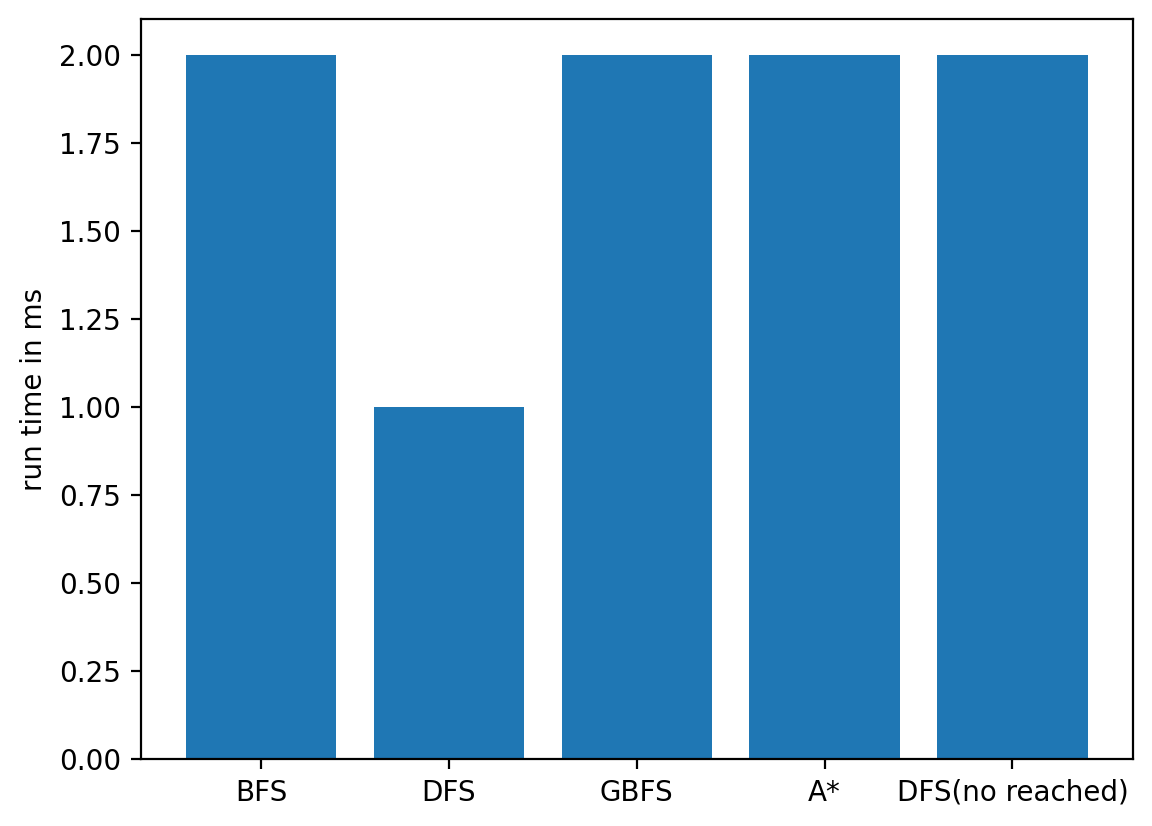

In [66]:
import matplotlib.pyplot as plt

plt.bar(df.columns, height = df.iloc[0])
plt.ylabel("run time in ms")
plt.show()